In [5]:
import numpy as np
import pandas as pd
def log_10_product(x, pos):
    """The two args are the value and tick position.
    Label ticks with the product of the exponentiation"""
    return '%1i' % (x)


In [7]:
df_cpu = pd.read_excel('CPU.xlsx', header=None)
array_cpu = df_cpu.as_matrix()

year_cpu = array_cpu[:,0]
peak_cpu = array_cpu[:,4]

year_cpu = np.array(year_cpu,dtype=int)
peak_cpu = np.array(peak_cpu,dtype=int)


df_gpu = pd.read_excel('GPU.xlsx', header=None)
array_gpu = df_gpu.as_matrix()

year_gpu = array_gpu[:,0]
peak_gpu = array_gpu[:,3]

year_gpu = np.array(year_gpu,dtype=int)
peak_gpu = np.array(peak_gpu,dtype=int)

print(year_gpu)

[2008 2009 2010 2011 2012 2013 2014 2015 2016 2017]


C:\Users\hibeid\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\hibeid\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

sns.set()

sns.set_style("whitegrid")

fig, ax = plt.subplots()

plt.plot(year_gpu,peak_gpu,'o',color='orangered')
coefficients =np.polyfit(year_gpu,np.log(peak_gpu),1)
print(np.log(2)/coefficients[0])
fitted_y=np.polyval(coefficients, year_gpu)
plt.plot(year_gpu, np.exp(fitted_y),linewidth=2.5,color='orangered',label='GPU')

plt.plot(year_cpu,peak_cpu,'o',color='navy')
coefficients =np.polyfit(year_cpu,np.log(peak_cpu),1)
print(np.log(2)/coefficients[0])
fitted_y=np.polyval(coefficients, year_cpu)
plt.plot(year_cpu, np.exp(fitted_y),linewidth=2.5,color='navy',label='CPU')

plt.xlabel('Year',size=15);
plt.ylabel('GByte/s',size=15);
plt.yscale('log')

sns.set_context(rc={"font.size":13})   
ax.tick_params(axis='both', which='major', labelsize=13)

axes = plt.gca()

legend = plt.legend(fontsize=13,loc=2,frameon=True)
frame = legend.get_frame()
frame.set_facecolor('white')

plt.show()
fig = ax.get_figure()
# fig.savefig('trend_bw.pdf',bbox_inches='tight')

2.979388060126696
5.1998765952660415


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

df = pd.read_excel('CPU.xlsx', header=None)
array = df.as_matrix()

year1 = array[:,0]
peak1 = array[:,2]
peak2 = array[:,4]

# unq, unq_inv, unq_cnt = np.unique(year, return_inverse=True, return_counts=True)

# xmax = np.zeros(unq.shape[0])
# np.maximum.at(xmax, unq_inv, peak)

year1 = np.array(year1,dtype=float)
peak1 = np.array(peak1,dtype=float)
peak2 = np.array(peak2,dtype=float)

peak1 = peak1 / peak2

print peak1

df = pd.read_excel('GPU.xlsx', header=None)
array = df.as_matrix()

year2 = array[:,0]
peak11 = array[:,1]
peak22 = array[:,3]

# unq, unq_inv, unq_cnt = np.unique(year, return_inverse=True, return_counts=True)

# xmax = np.zeros(unq.shape[0])
# np.maximum.at(xmax, unq_inv, peak)

year2 = np.array(year2,dtype=float)
peak11 = np.array(peak11,dtype=float)
peak22 = np.array(peak22,dtype=float)

peak2 = peak11 / peak22

sns.set()

sns.set_style("whitegrid")

fig, ax = plt.subplots()

plt.plot(year1,peak1,'o',color='navy')
coefficients =np.polyfit(year1,np.log(peak1),1)
print np.log(2)/coefficients[0]
fitted_y=np.polyval(coefficients, year1)
plt.plot(year1, np.exp(fitted_y),color='navy',label='CPU')

plt.plot(year2,peak2,'o',color='orangered')
coefficients =np.polyfit(year2,np.log(peak2),1)
print np.log(2)/coefficients[0]
fitted_y=np.polyval(coefficients, year2)
plt.plot(year2, np.exp(fitted_y),color='orangered',label='GPU')


# coefficients =np.polyfit(year,np.log(peak),1)
# print np.log(2)/coefficients[0]
# fitted_y=np.polyval(coefficients, year)
# plt.plot(year, np.exp(fitted_y),linewidth=2.5,color='orangered')
plt.xlabel('Year',size=15);
plt.ylabel('FLOP/Byte',size=15);

# from matplotlib.ticker import ScalarFormatter
# for axis in [ax.xaxis, ax.yaxis]:
#     ax.yaxis.set_major_formatter(ScalarFormatter())
# sf = ScalarFormatter()
# sf.set_scientific(False)


plt.yscale('log')

# ax.semilogy()

# for axis in [ax.xaxis, ax.yaxis]:
#     axis.set_major_formatter(ScalarFormatter())


# formatter = FuncFormatter(log_10_product)
# ax.xaxis.set_major_formatter(formatter)
# ax.yaxis.set_major_formatter(formatter)

# major_ticks = np.arange(200, 6000, 500)

# ax.set_yticks(major_ticks)

# ax.get_xaxis().set_minor_locator(matplotlib.ticker.AutoMinorLocator())
# ax.get_yaxis().set_minor_locator(matplotlib.ticker.AutoMinorLocator())
# ax.grid(b=True, which='minor',  linewidth=.2)
# ax.grid(b=True, which='major',  linewidth=1)


sns.set_context(rc={"font.size":13})   
ax.tick_params(axis='both', which='major', labelsize=13)

axes = plt.gca()
# axes.set_ylim([.9e1,1e4])

legend = plt.legend(fontsize=13,loc=2,frameon=True)
frame = legend.get_frame()
frame.set_facecolor('white')


plt.show()
fig = ax.get_figure()
# fig.savefig('balance.pdf',bbox_inches='tight')

[ 1.96153846  2.07692308  1.65625     2.5         2.59375     3.64705882
  4.31666667  9.73529412  9.73529412 10.05194805 10.84705882]
3.2583481610989184
2.913074514825393


In [52]:
df = pd.read_excel('BW.xlsx', header=None)
array = df.as_matrix()

year = array[:,0]
BW = array[:,1:5]
BW = BW.max(axis=1)

unq, unq_inv, unq_cnt = np.unique(year, return_inverse=True, return_counts=True)
xmax = np.zeros(27)
np.maximum.at(xmax, unq_inv, BW)

[1.0549700e+05 4.7451200e+04 2.3737000e+03 1.2383900e+04 1.6967700e+05
 3.5984100e+05 4.3735800e+05 1.2782600e+04 6.0749200e+05 2.8834500e+05
 1.0169560e+05 2.1302430e+05 1.0085940e+06 1.1199130e+06 5.5871000e+04
 4.3855850e+06 2.2705900e+05 8.0580460e+05 4.4586900e+05 4.3844610e+06
 5.8593670e+06 7.1396900e+06 4.0027030e+06 2.4506800e+05 1.3838195e+07
 6.3670150e+06 1.5308650e+06]


In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.set_style("whitegrid")

fig, ax = plt.subplots()

plt.plot(unq,xmax/1e3,'o',color='navy')
plt.yscale('log')
coefficients =np.polyfit(unq,np.log(xmax/1e3),1)
print np.log(2)/coefficients[0]
fitted_y=np.polyval(coefficients, unq)
plt.plot(unq, np.exp(fitted_y),linewidth=2.5,color='orangered')
plt.xlabel('Year',size=15);
plt.ylabel('GB/s',size=15);

sns.set_context(rc={"font.size":13})   
ax.tick_params(axis='both', which='major', labelsize=13)


plt.show()
fig = ax.get_figure()
fig.savefig('BW_projection.pdf',bbox_inches='tight')

3.4150244784345656


In [35]:
# Single thread

df = pd.read_excel('FLOP.xlsx', header=None)
array = df.as_matrix()

year = array[:,0]
FLOP = array[:,1]
FLOP = FLOP.astype(float)

unq, unq_inv, unq_cnt = np.unique(year, return_inverse=True, return_counts=True)

xmax = np.zeros(unq.shape[0])
np.maximum.at(xmax, unq_inv, FLOP)


2.6463106747221907


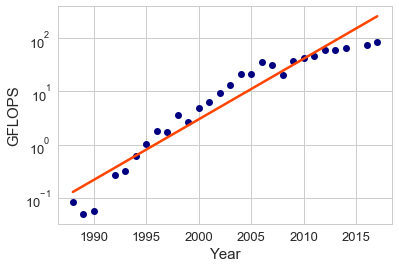

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.set_style("whitegrid")

fig, ax = plt.subplots()

plt.plot(unq,xmax/1e3,'o',color='navy')
plt.yscale('log')
coefficients =np.polyfit(unq,np.log(xmax/1e3),1)
print np.log(2)/coefficients[0]
fitted_y=np.polyval(coefficients, unq)
plt.plot(unq, np.exp(fitted_y),linewidth=2.5,color='orangered')
plt.xlabel('Year',size=15);
plt.ylabel('GFLOPS',size=15);
# plt.grid()

sns.set_context(rc={"font.size":13})   
ax.tick_params(axis='both', which='major', labelsize=13)

plt.show()
fig = ax.get_figure()
fig.savefig('FLOP_projection.pdf',bbox_inches='tight')

In [44]:
df = pd.read_excel('interconnect.xlsx', header=None)
array = df.as_matrix()

year = array[1:,0]
year = year.astype(float)

interconnect = array[1:,1]
interconnect = interconnect.astype(float)

unq, unq_inv, unq_cnt = np.unique(year, return_inverse=True, return_counts=True)

xmax = np.zeros(unq.shape[0])
np.maximum.at(xmax, unq_inv, interconnect)

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.set_style("whitegrid")

fig, ax = plt.subplots()

plt.plot(unq,xmax/1e3,'o',color='navy')
plt.yscale('log')
coefficients =np.polyfit(unq,np.log(xmax/1e3),1)
print np.log(2)/coefficients[0]
fitted_y=np.polyval(coefficients, unq)
plt.plot(unq, np.exp(fitted_y),linewidth=2.5,color='orangered')
plt.xlabel('Year',size=15);
plt.ylabel('GByte/s',size=15);

sns.set_context(rc={"font.size":13})   
ax.tick_params(axis='both', which='major', labelsize=13)

plt.show()
fig = ax.get_figure()
fig.savefig('connect_projection.pdf',bbox_inches='tight')

3.0228033894886184


In [39]:
df = pd.read_excel('cores.xlsx', header=None)
array = df.as_matrix()

year = array[:,0]
year = year.astype(float)

cores = array[:,1]
cores = cores.astype(float)

unq, unq_inv, unq_cnt = np.unique(year, return_inverse=True, return_counts=True)

xmax = np.zeros(unq.shape[0])
np.maximum.at(xmax, unq_inv, cores)

2.0033317760532383


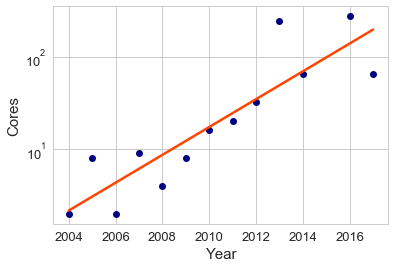

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.set_style("whitegrid")

fig, ax = plt.subplots()

plt.plot(unq,xmax,'o',color='navy')
plt.yscale('log')
coefficients =np.polyfit(unq,np.log(xmax),1)
print np.log(2)/coefficients[0]
fitted_y=np.polyval(coefficients, unq)
plt.plot(unq, np.exp(fitted_y),linewidth=2.5,color='orangered')
plt.xlabel('Year',size=15);
plt.ylabel('Cores',size=15);

sns.set_context(rc={"font.size":13})   
ax.tick_params(axis='both', which='major', labelsize=13)


plt.show()


fig.savefig('cores.pdf',bbox_inches='tight')

In [11]:
df = pd.read_excel('watt.xlsx', header=None)
array = df.as_matrix()

year = array[:,0]
year = year.astype(float)

watt = array[:,1]
watt = watt.astype(float)

unq, unq_inv, unq_cnt = np.unique(year, return_inverse=True, return_counts=True)

xmin = np.ones(unq.shape[0]) * 100000000
np.minimum.at(xmin, unq_inv, watt)

5.017945811564608


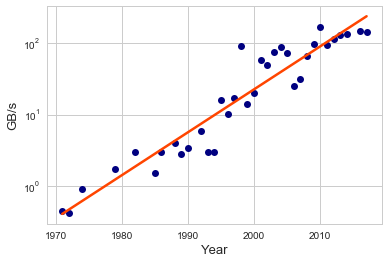

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

# fig, ax = plt.subplots()
# fig.set_size_inches(8, 6)

# plt.plot(unq,xmin,'o')
# plt.yscale('log')
# coefficients =np.polyfit(unq,np.log(xmin),1)
# print np.log(2)/coefficients[0]
# fitted_y=np.polyval(coefficients, unq)
# plt.plot(unq, np.exp(fitted_y),linewidth=3.)
# plt.xlabel('Year',size=16);
# plt.ylabel('Watt',size=16);

# sns.set_context(rc={"font.size":16})   
# ax.tick_params(axis='both', which='major', labelsize=12)

# plt.show()


sns.set_style("whitegrid")

plt.plot(unq,xmin,'o',color='navy')
plt.yscale('log')
coefficients =np.polyfit(unq,np.log(xmin),1)
print np.log(2)/coefficients[0]
fitted_y=np.polyval(coefficients, unq)
plt.plot(unq, np.exp(fitted_y),linewidth=2.5,color='orangered')
plt.xlabel('Year',size=13);
plt.ylabel('GB/s',size=13);
# plt.grid()

sns.set_context(rc={"font.size":11})   
ax.tick_params(axis='both', which='major', labelsize=11)


plt.show()

fig = ax.get_figure()
fig.savefig('watt.pdf',bbox_inches='tight')

In [96]:
2.6463106747221907/2.0033317760532383

1.3209547746183532

In [100]:
# machine peak top500
df = pd.read_excel('peak.xlsx', header=None)
array = df.as_matrix()

year = array[:,0]
year = year.astype(float)

peak = array[:,1]
peak = peak.astype(float)

unq, unq_inv, unq_cnt = np.unique(year, return_inverse=True, return_counts=True)

xmax = np.zeros(unq.shape[0])
np.maximum.at(xmax, unq_inv, peak)

1.1320950200779127


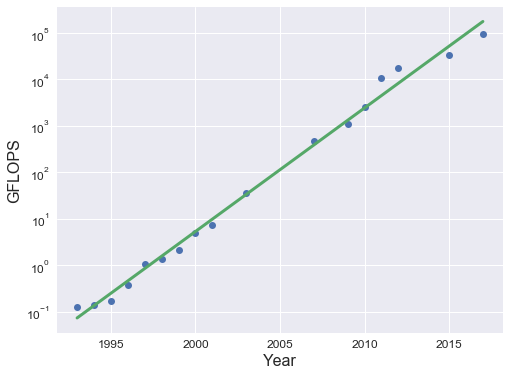

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

fig, ax = plt.subplots()
fig.set_size_inches(8, 6)

plt.plot(unq,xmax,'o')
plt.yscale('log')
coefficients =np.polyfit(unq,np.log(xmax),1)
print np.log(2)/coefficients[0]
fitted_y=np.polyval(coefficients, unq)
plt.plot(unq, np.exp(fitted_y),linewidth=3.)
plt.xlabel('Year',size=16);
plt.ylabel('GFLOPS',size=16);

sns.set_context(rc={"font.size":16})   
ax.tick_params(axis='both', which='major', labelsize=12)

plt.show()

fig = ax.get_figure()

fig.savefig('peak.pdf',bbox_inches='tight')

In [99]:
df = pd.read_excel('Tesla.xlsx', header=None)
array = df.as_matrix()

year = array[3:,0]
BW = array[3:,3]

unq, unq_inv, unq_cnt = np.unique(year, return_inverse=True, return_counts=True)

xmax = np.zeros(unq.shape[0])
np.maximum.at(xmax, unq_inv, BW)



1.6973620553352726


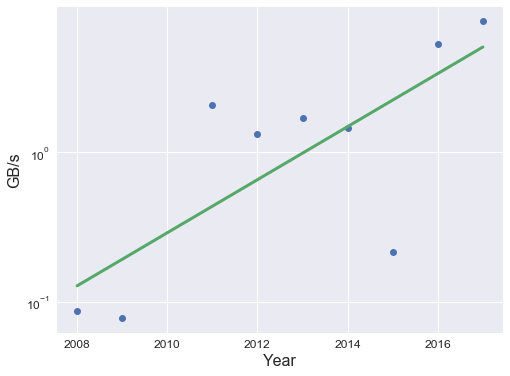

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

fig, ax = plt.subplots()
fig.set_size_inches(8, 6)

plt.plot(unq,xmax/1e3,'o')
plt.yscale('log')
coefficients =np.polyfit(unq,np.log(xmax/1e3),1)
print np.log(2)/coefficients[0]
fitted_y=np.polyval(coefficients, unq)
plt.plot(unq, np.exp(fitted_y),linewidth=3.)
plt.xlabel('Year',size=16);
plt.ylabel('GB/s',size=16);
# plt.grid()

sns.set_context(rc={"font.size":16})   
ax.tick_params(axis='both', which='major', labelsize=12)

plt.show()

fig = ax.get_figure()
fig.savefig('GPU_BW_projection.pdf',bbox_inches='tight')

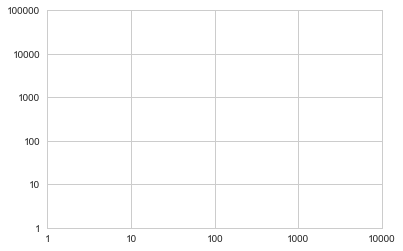

In [8]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

fig, ax = plt.subplots()
ax.axis([1, 10000, 1, 100000])
ax.loglog()

for axis in [ax.xaxis, ax.yaxis]:
    axis.set_major_formatter(ScalarFormatter())


plt.show()


In [1]:
df = pd.read_excel('green500.xlsx', header=None)
array = df.as_matrix()

year = array[:,0]
FLOP = array[:,1]
FLOP = FLOP.astype(float)

unq, unq_inv, unq_cnt = np.unique(year, return_inverse=True, return_counts=True)

xmax = np.zeros(unq.shape[0])
np.maximum.at(xmax, unq_inv, FLOP)

import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.set_style("whitegrid")

fig, ax = plt.subplots()

plt.plot(unq,xmax,'o',color='orangered')
plt.yscale('log')
coefficients =np.polyfit(unq,np.log(xmax),1)
print np.log(2)/coefficients[0]
fitted_y=np.polyval(coefficients, unq)
plt.plot(unq, np.exp(fitted_y),linewidth=2.5,color='orangered',label='CPU-GPU')
print np.exp(fitted_y)
plt.plot([2018,2019,2020,2021,2022], [12.9080,18.8528,27.5354,40.2167,58.7385],'--',linewidth=2.5,color='orangered')

year = array[:,0]
FLOP = array[:,2]
FLOP = FLOP.astype(float)

unq, unq_inv, unq_cnt = np.unique(year, return_inverse=True, return_counts=True)

xmax = np.zeros(unq.shape[0])
np.maximum.at(xmax, unq_inv, FLOP)

plt.plot(unq,xmax,'o',color='navy')
plt.yscale('log')
coefficients =np.polyfit(unq,np.log(xmax),1)
print np.log(2)/coefficients[0]
fitted_y=np.polyval(coefficients, unq)
plt.plot(unq, np.exp(fitted_y),linewidth=2.5,color='navy',label='CPU')
print np.exp(fitted_y)
plt.plot([2018,2019,2020,2021,2022,2023,2024,2025,2026], [6.9857,9.2267,12.1865,16.0957,21.2590,28.0787,37.0859,48.9826,64.6956],'--',linewidth=2.5,color='navy')

plt.axhline(y=50, color='black', linestyle='--')
plt.text(2013,55,'50 GFLOP/watt',fontsize=13)

plt.xlabel('Year',size=15);
plt.ylabel('GFLOP/watt',size=15);

sns.set_context(rc={"font.size":13})   
ax.tick_params(axis='both', which='major', labelsize=13)

axes = plt.gca()
axes.set_ylim([1e0,1e2])


sns.set_context(rc={"font.size":13})   
ax.tick_params(axis='both', which='major', labelsize=13)

legend = plt.legend(fontsize=13,loc=4,frameon=True)
frame = legend.get_frame()
frame.set_facecolor('white')

fig.savefig('trend_power.pdf',bbox_inches='tight')


SyntaxError: invalid syntax (<ipython-input-1-807118bd6a5d>, line 23)

In [7]:
df_cpu = pd.read_excel('top500_07-18.xlsx', header=None)
array_cpu = df_cpu.as_matrix()

year_500 = array_cpu[:,0]
peak_500 = array_cpu[:,1]

year_500 = np.array(year_500,dtype=int)
peak_500 = np.array(peak_500,dtype=float)


print(year_500)

[2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018]


C:\Users\hibeid\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


0.5156703659974978
1.3441671778426543


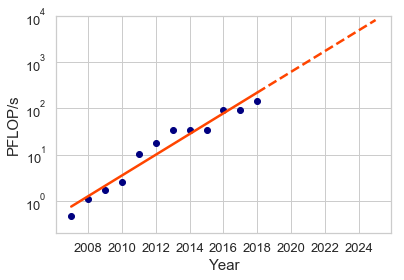

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

sns.set()

sns.set_style("whitegrid")

fig, ax = plt.subplots()

plt.plot(year_500,peak_500,'o',color='navy')
coefficients =np.polyfit(year_500,np.log(peak_500),1)
print(np.log(2)/coefficients[0])
fitted_y=np.polyval(coefficients, year_500)
plt.plot(year_500, np.exp(fitted_y),linewidth=2.5,color='orangered')

project_year = [2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025]
d = np.log(2)/coefficients[0];
project_peak = np.ones((8));
project_peak[0] = 219.97020123;
for i in range(0,7):
    project_peak[i + 1] = 2**(1/d) * project_peak[i]
#     print(project_peak)
plt.plot(project_year, project_peak,'--',linewidth=2.5,color='orangered')

    
plt.xlabel('Year',size=15);
plt.ylabel('PFLOP/s',size=15);
plt.yscale('log')

sns.set_context(rc={"font.size":13})   
ax.tick_params(axis='both', which='major', labelsize=13)

ax.set_xticks([2008,2010,2012,2014,2016,2018,2020,2022,2024])                                                       
# ax.set_xticks([2008,2011,2014,2017,2020,2023])                                                       

axes = plt.gca()
axes.set_ylim([.2e0,1e4])

# legend = plt.legend(fontsize=13,loc=2,frameon=True)
# frame = legend.get_frame()
# frame.set_facecolor('white')


plt.show()
fig = ax.get_figure()
# fig.savefig('trend_top500.pdf',bbox_inches='tight')

In [50]:
len(np.array(project_peak,dtype=float))

TypeError: len() of unsized object

In [69]:
project_peak

array([  143500.        ,   244616.78162215,   416985.15575734,
         710812.31209459,  1211683.76391622,  2065492.56218118,
        3520934.79460105,  6001949.39203315, 10231202.39538796,
       17440583.98665256, 29730031.52909944, 50679196.02908276,
       86390117.2671241 ])

In [16]:
d = np.log(2)/coefficients[0];
project_peak[0] = 1;
for i in range(0,7):
    project_peak[i + 1] = 2**(1/d) * project_peak[i]
    print(project_peak[i + 1])

print(2**(7/d) * project_peak[0])

1.6747608282839648
2.804823831954392
4.6974090839945415
7.867036728299318
13.175404947226939
22.065652102394434
36.954689791631914
36.954689791631914


In [136]:
np.exp(fitted_y)

array([  0.75662923,   1.26717299,   2.12221169,   3.55419701,
         5.95242992,   9.96889646,  16.6955173 ,  27.96099838,
        46.82798481,  78.42567463, 131.3442478 , 219.97020123])

In [134]:
np.array(project_peak,dtype=float)

array([ 219970.20123004,  368397.47640981,  616977.66272982,
       1033290.0214661 , 1730513.65220812, 2898196.47752877,
       4853785.93323576, 8128930.54985898])

In [138]:
project_peak

array([ 219.97020123,  368.39747641,  616.97766273, 1033.29002147,
       1730.51365221, 2898.19647753, 4853.78593323, 8128.93054986])

In [24]:
d = 3.29
print(2**(10/d))

8.222138521910265
